In [1]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("creditcard.csv")

In [4]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
df.shape

(284807, 31)

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df.isnull().count()

Time      284807
V1        284807
V2        284807
V3        284807
V4        284807
V5        284807
V6        284807
V7        284807
V8        284807
V9        284807
V10       284807
V11       284807
V12       284807
V13       284807
V14       284807
V15       284807
V16       284807
V17       284807
V18       284807
V19       284807
V20       284807
V21       284807
V22       284807
V23       284807
V24       284807
V25       284807
V26       284807
V27       284807
V28       284807
Amount    284807
Class     284807
dtype: int64

In [8]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

##### Above is the scenario of Imbalanced Dataset

In [9]:
X = df.drop("Class",axis=1)
y = df['Class']

#### They say that Ensemble Techniques/Decision Trees do not get affected/no impact with imbalanced Dataset

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##### 1. Cross Validation like KFold, Hyperparameter Tuning

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [13]:
10.0**np.arange(-2,3)

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [14]:
log_class = LogisticRegression()
param_grid = {'C':10.0**np.arange(-2,3),
             'penalty':['l1','l2']}
cv = KFold(n_splits=5,shuffle=False,random_state=None)

In [15]:
clf = GridSearchCV(estimator=log_class,param_grid=param_grid,cv=cv,n_jobs=-1,scoring='f1_macro')

In [16]:
clf.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
Value

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [17]:
clf.best_params_

{'C': 1.0, 'penalty': 'l2'}

In [18]:
y_pred = clf.predict(X_test)

In [19]:
confusion_matrix(y_test,y_pred)

array([[85242,    65],
       [   58,    78]], dtype=int64)

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.55      0.57      0.56       136

    accuracy                           1.00     85443
   macro avg       0.77      0.79      0.78     85443
weighted avg       1.00      1.00      1.00     85443



In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rf_classifier = RandomForestClassifier()

In [23]:
rf_classifier.fit(X_train,y_train)

RandomForestClassifier()

In [24]:
y_pred = rf_classifier.predict(X_test)

In [25]:
confusion_matrix(y_test,y_pred)

array([[85295,    12],
       [   23,   113]], dtype=int64)

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.90      0.83      0.87       136

    accuracy                           1.00     85443
   macro avg       0.95      0.92      0.93     85443
weighted avg       1.00      1.00      1.00     85443



##### 2. Use at last only

In [27]:
class_weight = dict({0:1,1:100})

In [28]:
rf_classifier_2 = RandomForestClassifier(class_weight=class_weight)

In [29]:
rf_classifier_2.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 1, 1: 100})

In [30]:
y_pred_2 = rf_classifier_2.predict(X_test)

In [31]:
confusion_matrix(y_test,y_pred_2)

array([[85302,     5],
       [   30,   106]], dtype=int64)

In [32]:
print(classification_report(y_test,y_pred_2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.95      0.78      0.86       136

    accuracy                           1.00     85443
   macro avg       0.98      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443



#### Under Sampling

#### Reduce the points of the maximum labels - not recommended as there is data loss only used when we have ery small dataset

In [33]:
pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
Note: you may need to restart the kernel to use updated packages.


In [34]:
y_train.value_counts()

0    199008
1       356
Name: Class, dtype: int64

In [35]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [37]:
from collections import Counter

In [39]:
Counter(y_train)

Counter({0: 199008, 1: 356})

In [41]:
from imblearn.under_sampling import NearMiss
ns = NearMiss(0.8)
X_train_ns,y_train_ns = ns.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

C:\ProgramData\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


The number of classes before fit Counter({0: 199008, 1: 356})
The number of classes after fit Counter({0: 445, 1: 356})


In [42]:
rf_classifier.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [43]:
pred_3 = rf_classifier.predict(X_test)

In [44]:
confusion_matrix(y_test,pred_3)

array([[58175, 27132],
       [    7,   129]], dtype=int64)

In [45]:
print(classification_report(y_test,pred_3))

              precision    recall  f1-score   support

           0       1.00      0.68      0.81     85307
           1       0.00      0.95      0.01       136

    accuracy                           0.68     85443
   macro avg       0.50      0.82      0.41     85443
weighted avg       1.00      0.68      0.81     85443



#### Over Sampling

#### Whichever class is having less number of values we are going to impute and increase those values

In [47]:
from imblearn.over_sampling import RandomOverSampler

In [50]:
os = RandomOverSampler(0.5)
X_train_os,y_train_os = os.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_os)))

C:\ProgramData\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


The number of classes before fit Counter({0: 199008, 1: 356})
The number of classes after fit Counter({0: 199008, 1: 99504})


In [51]:
rf_classifier.fit(X_train_os,y_train_os)

RandomForestClassifier()

In [52]:
y_pred_3 = rf_classifier.predict(X_test)

In [53]:
confusion_matrix(y_test,y_pred_3)

array([[85302,     5],
       [   25,   111]], dtype=int64)

In [54]:
print(classification_report(y_test,y_pred_3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.96      0.82      0.88       136

    accuracy                           1.00     85443
   macro avg       0.98      0.91      0.94     85443
weighted avg       1.00      1.00      1.00     85443



#### SMOTETomek

In [55]:
from imblearn.combine import SMOTETomek

In [57]:
ST = SMOTETomek(0.5)
X_train_ST,y_train_ST = ST.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ST)))

C:\ProgramData\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


The number of classes before fit Counter({0: 199008, 1: 356})
The number of classes after fit Counter({0: 198204, 1: 98700})


In [58]:
rf_classifier.fit(X_train_ST,y_train_ST)

RandomForestClassifier()

In [59]:
y_pred_4 = rf_classifier.predict(X_test)

In [60]:
import seaborn as sns

<AxesSubplot:>

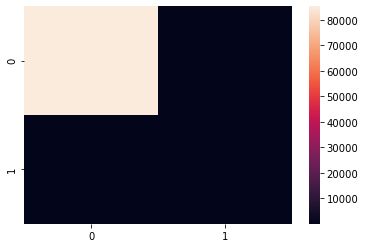

In [61]:
sns.heatmap(confusion_matrix(y_test,y_pred_4))

In [62]:
print(classification_report(y_test,y_pred_4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.83      0.87      0.85       136

    accuracy                           1.00     85443
   macro avg       0.91      0.93      0.92     85443
weighted avg       1.00      1.00      1.00     85443



#### Ensemble Techniques

In [63]:
from imblearn.ensemble import EasyEnsembleClassifier

In [64]:
easy = EasyEnsembleClassifier()

In [65]:
easy.fit(X_train,y_train)

EasyEnsembleClassifier()

In [66]:
y_pred_5 = easy.predict(X_test)